In [214]:
#Python Project On Customer Churn
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [216]:
churn=pd.read_csv("TCA.csv")
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [217]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [220]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [222]:
#Replacing The Blank Values " " to 0
churn["TotalCharges"]=churn["TotalCharges"].replace(" ", "0")

In [224]:
#changing the datatype From int To Float Of Total Charges Coloumn
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

In [226]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
 churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [230]:
#to check the duplicates in dataset

In [232]:
churn.duplicated().sum()

0

In [234]:
#to check the duplicates in customerId column 

In [236]:
churn["customerID"].duplicated().sum()

0

In [238]:
#Converting Senior Citizen Values From 0 to Yes/No Means If Senior Citizen Is Present Than Yes Else No

In [240]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

churn["SeniorCitizen"]=churn["SeniorCitizen"].apply(conv)


In [242]:
#Lets See The Output
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [244]:
#Now lets See The "Gender" Values In Terms Of Graph

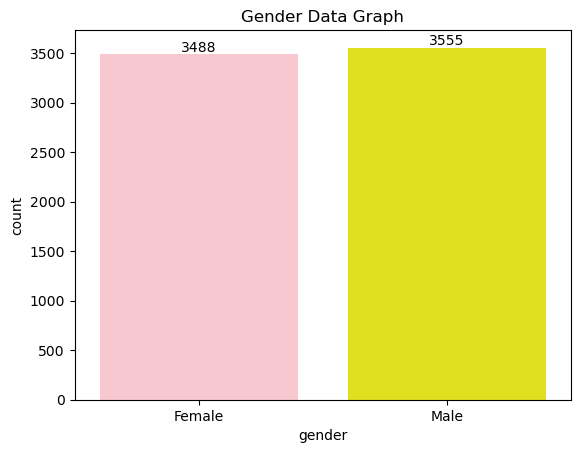

In [246]:
plt.title("Gender Data Graph")
cp=sns.countplot(x="gender",data=churn,hue="gender",palette=["pink","yellow"])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.show()

In [247]:
#We Can See That Male Subscribers Are More Than Female Subscribers

In [250]:
#Lets See How Many Senior Citizen Frequency Are Their

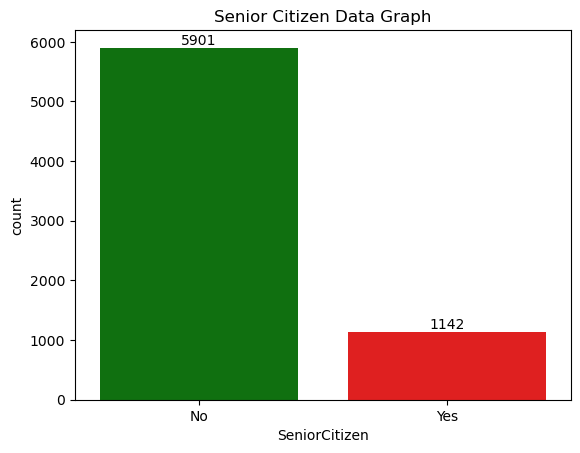

In [252]:
plt.title("Senior Citizen Data Graph")
cp=sns.countplot(x="SeniorCitizen",data=churn,hue="SeniorCitizen",palette=["green","red"])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.show()

In [253]:
#Lets See The Churn Subscriber Data

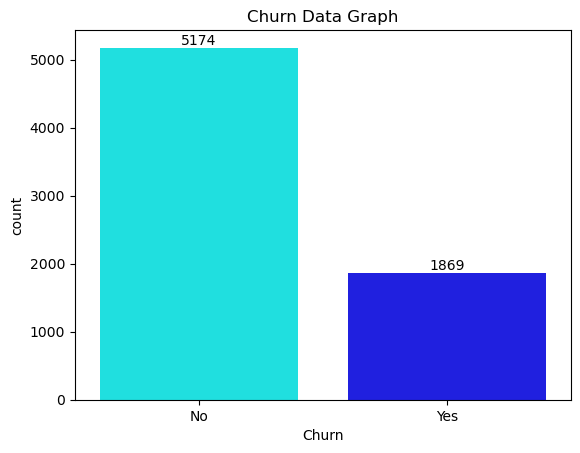

In [256]:
plt.title("Churn Data Graph")
cp=sns.countplot(x="Churn",data=churn,hue="Churn",palette=["cyan","blue"])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.show()

In [257]:
#Now Lets See The Churn Value In Percentage Or We Say In Pie

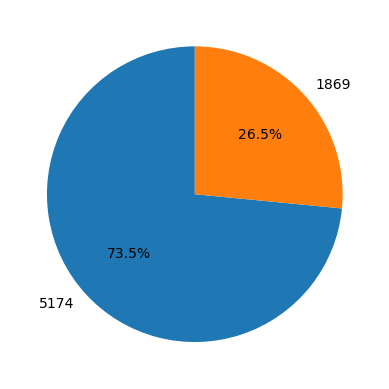

In [296]:
gb=churn.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb["Churn"],autopct="%0.1f%%",startangle=90)
plt.show()


In [262]:
#We Can See By Pie Chart That 73.5% People Npt Churn As A Subscriber Compared To Person Who Churn As Subscriber

In [264]:
#To Know The Churn By Gender As A Subscriber

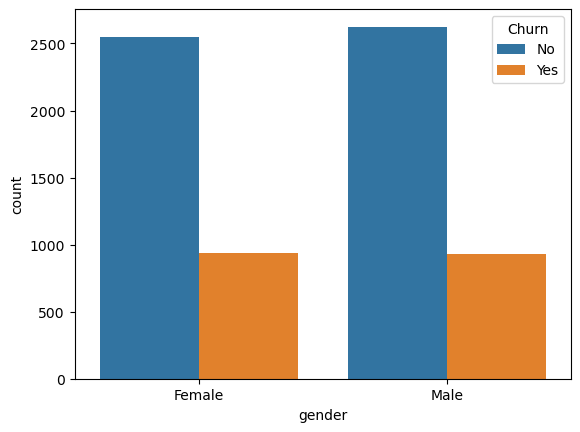

In [266]:
sns.countplot(x="gender", data=churn,hue="Churn")
plt.show()

In [267]:
#lets see the tenure using histogram

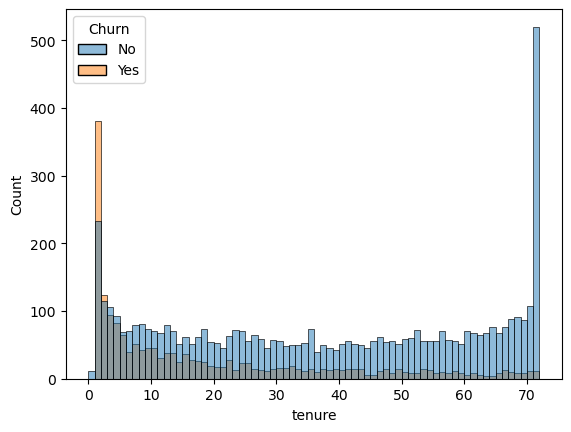

In [270]:
sns.histplot(x="tenure",data=churn,bins=72,hue="Churn")
plt.show()

In [271]:
#We Can See The Histogram Of Tenure On The Basis Of Churn

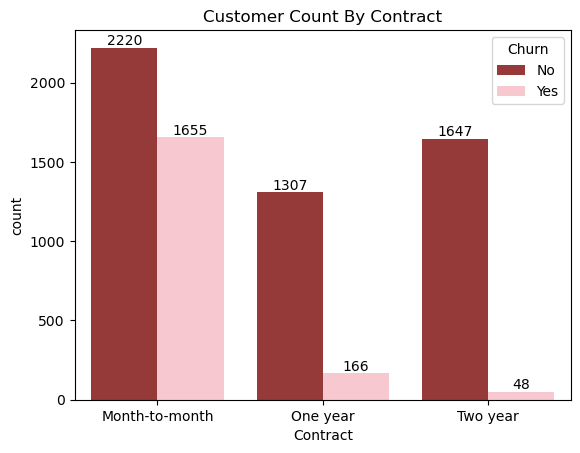

In [272]:
plt.title("Customer Count By Contract")
cp=sns.countplot(x="Contract",data=churn,hue="Churn",palette=["brown","pink"])
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.show()

In [273]:
#Here We Can See Customer Count On The Basis Of Churn

In [276]:
#To See The Countplot Of All Remaining Services On The Basis Of Churn

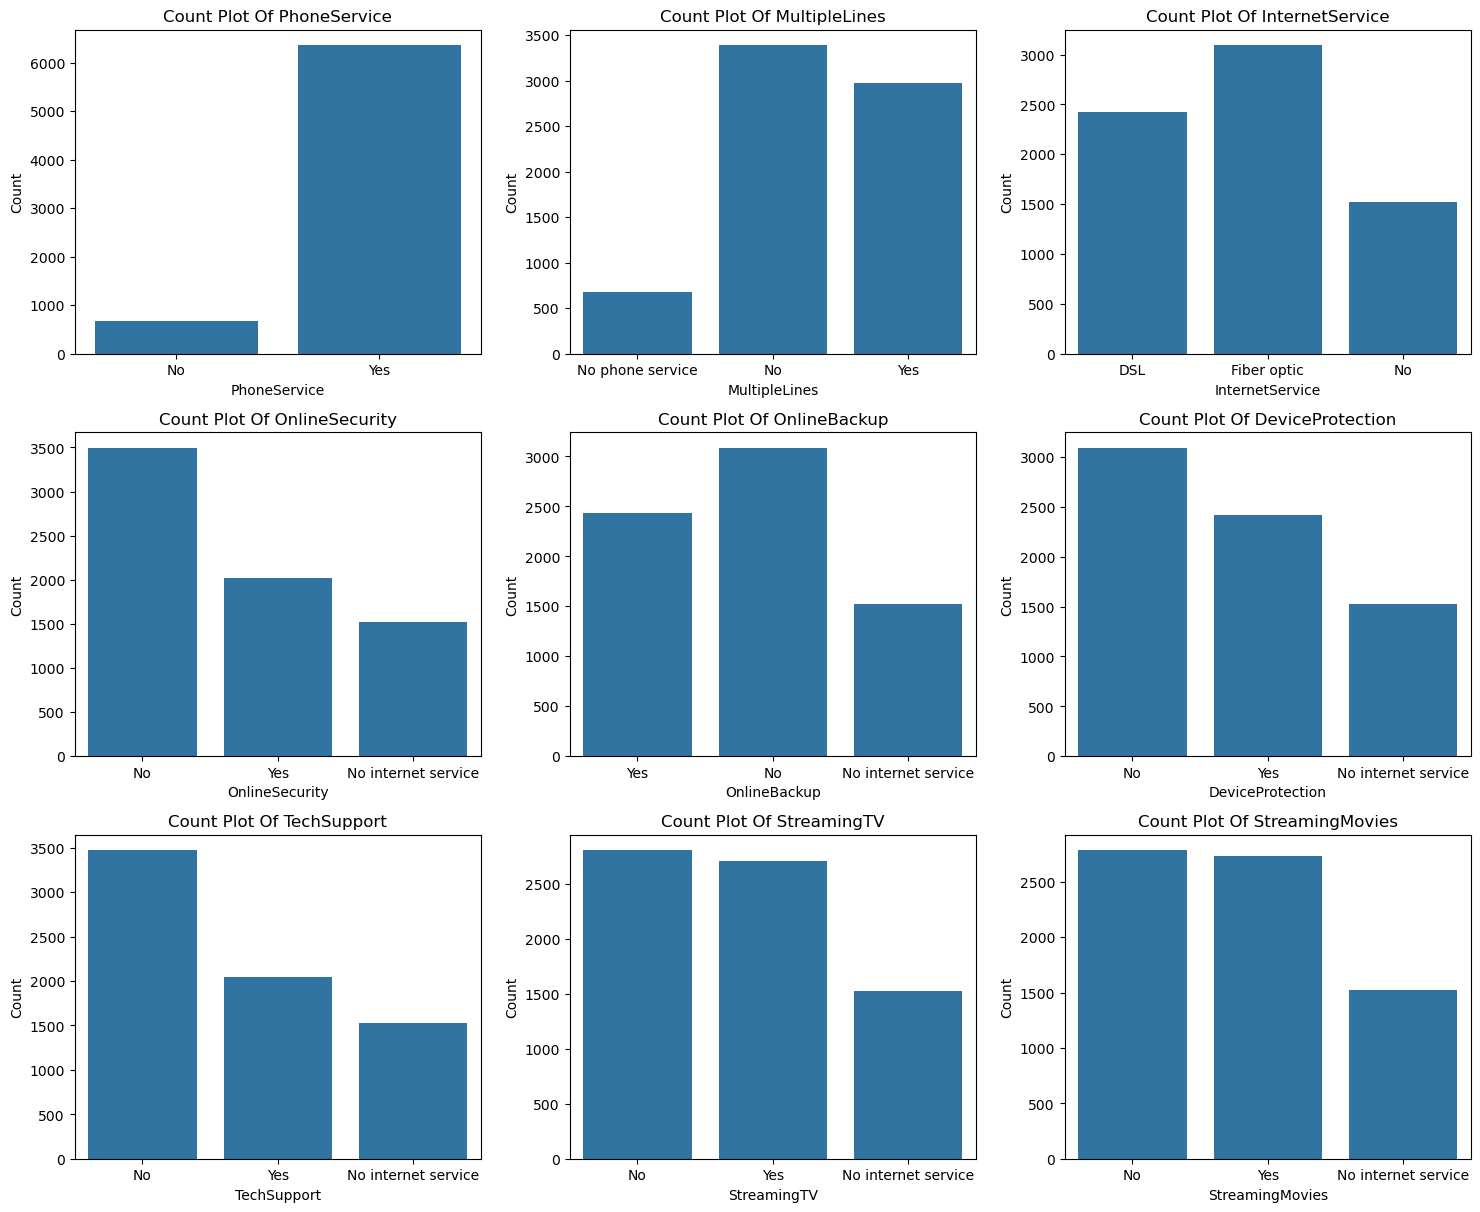

In [277]:
columns=["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
n_cols=3
n_rows=(len(columns)+n_cols-1)
fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))
axes=axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(x=col,data=churn,ax=axes[i])
    axes[i].set_title(f"Count Plot Of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range (i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [281]:
#Here Is The Graphs Countplot

In [282]:
#Countplots on the basis comparison using hue

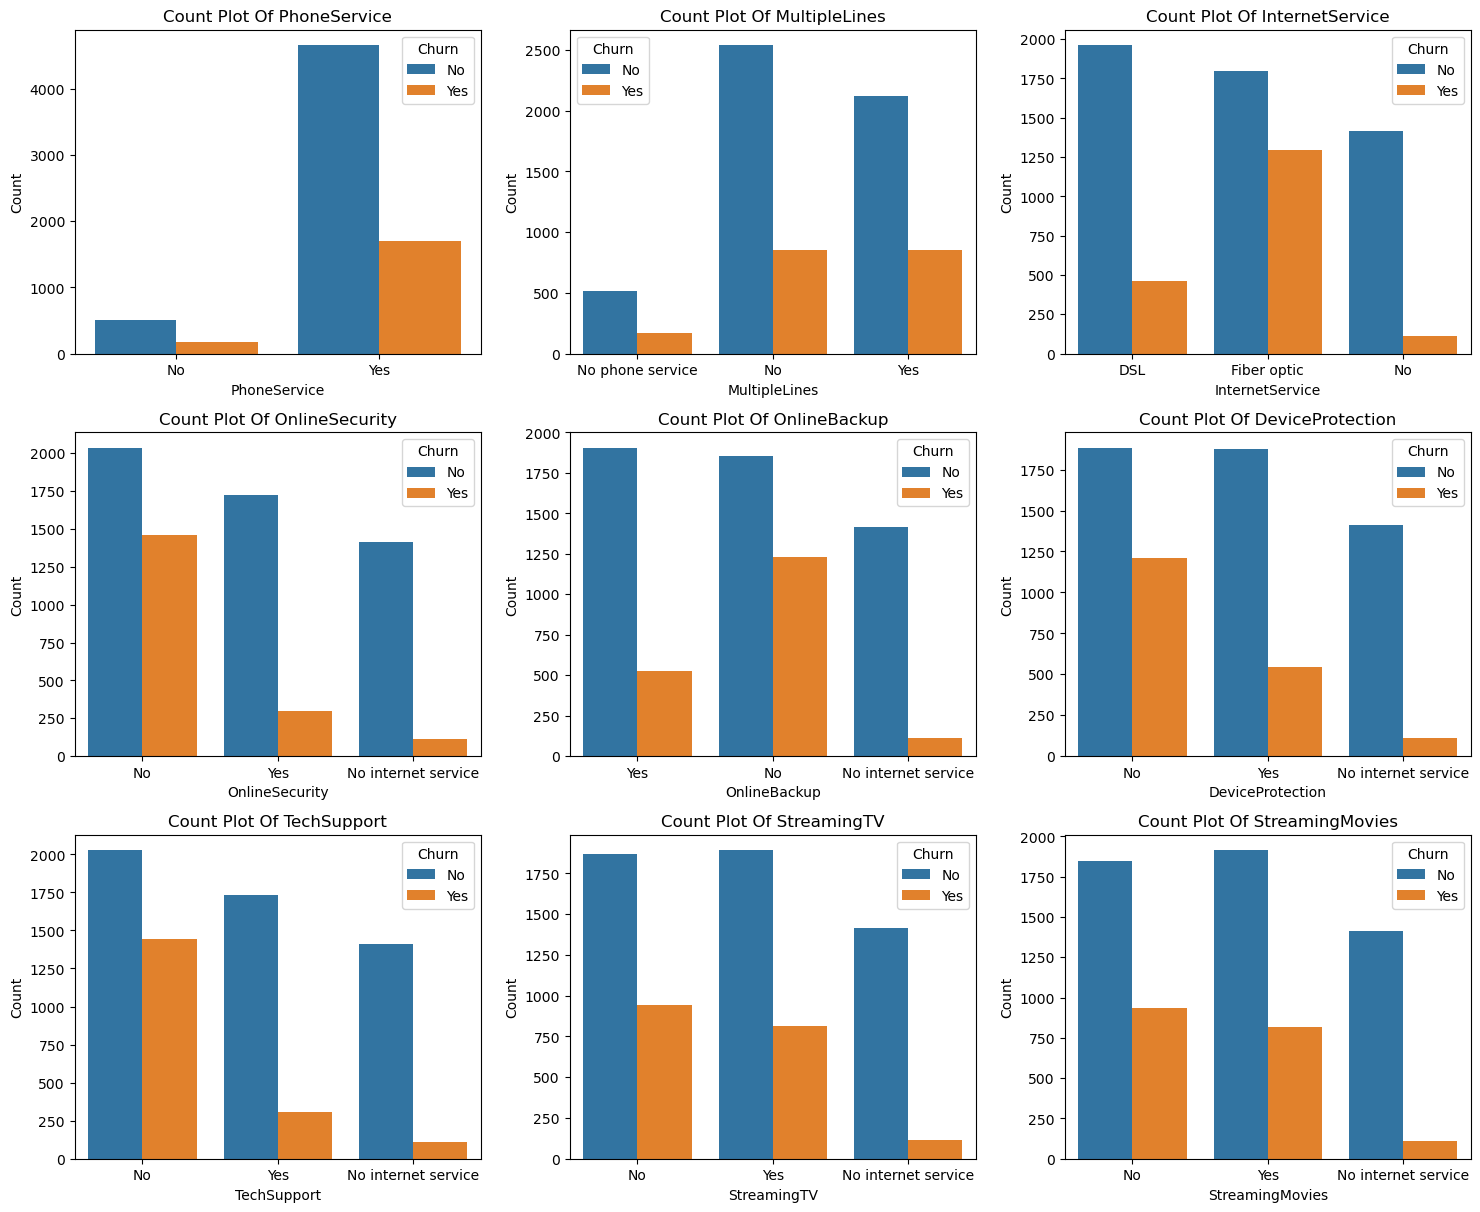

In [283]:
columns=["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
n_cols=3
n_rows=(len(columns)+n_cols-1)
fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))
axes=axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(x=col,data=churn,ax=axes[i],hue=churn["Churn"])
    axes[i].set_title(f"Count Plot Of {col}")
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range (i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [284]:
#Here is the comparison graph table

In [285]:
#At Last Lets See The Churned Customer On The Basis Of Payment Methods

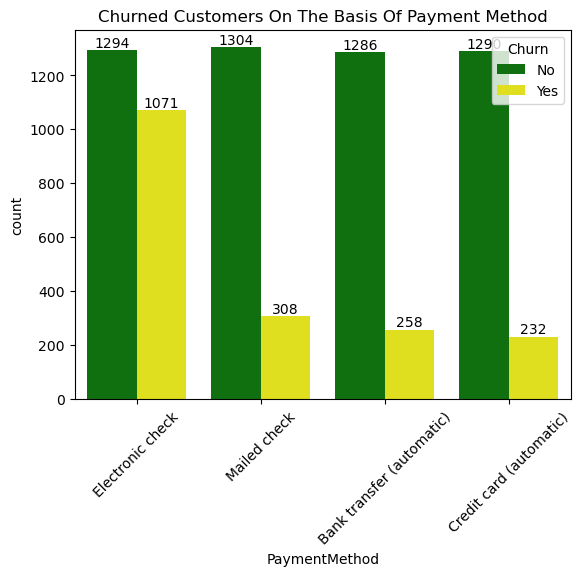

In [286]:
cp=sns.countplot(x="PaymentMethod", data=churn,hue="Churn",palette=["green","yellow"])
plt.xticks(rotation=45)
plt.title("Churned Customers On The Basis Of Payment Method")
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.show()

In [287]:
#Here The Final Comparison Table On The Basis Of Payemnt Method
#That Tells That Customers Are Churn When They Using Electic Check As A Payment Method!!!